In [1]:
import numpy 
import matplotlib.pyplot
%matplotlib inline

In [2]:
#Using Our Neural Network

from neuralNetwork import neuralNetwork

input_nodes = 784
hidden_nodes = 100
output_nodes = 10

#learning rate is 0.3
learning_rate = 0.3
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [3]:
training_data_file = open("folderForData/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [4]:
for record in training_data_list:
    #spilt the record by the ',' comma
    all_values = record.split(',')
    #scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:])/ 255.0 * 0.99) + 0.01
    #create the target output values (all 0.01, except the desired label which is 0.99)
    targets = numpy.zeros(output_nodes)+ 0.01
    #all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    
    pass

In [5]:
test_data_file = open("folderForData/mnist_test_10.csv", 'r')
#read all the information into the list
test_data_list = test_data_file.readlines()
test_data_file.close()

In [6]:
all_values = test_data_list[0].split(',')
#print the label
print(all_values[0])

7


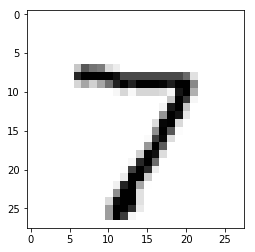

In [7]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation = 'None')

In [8]:
#Here we query through the percentages produced by the neural network in identifying what the value actually is
#In this case there are 10 possible numbers and the index with the highest percentage is what the neural network
#deems is the likeliest value of the number read
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[ 0.15290181],
       [ 0.12180802],
       [ 0.0423559 ],
       [ 0.16726378],
       [ 0.130733  ],
       [ 0.04642938],
       [ 0.03953785],
       [ 0.45817816],
       [ 0.13175468],
       [ 0.08645517]])

In [9]:
#test the neural network
#scorecard for how well the network performs, intially empty
scorecard = []

#go through all the records in the test data set

for record in test_data_list:
    #split the record by the ',' commas
    all_values = record.split(',')
    
    #correct answer is the first avlue
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    #scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    #query the network
    outputs = n.query(inputs)
    
    label = numpy.argmax(outputs)
    
    print(label, "network's answer")
    
    if(label == correct_label):
        #network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass

7 correct label
7 network's answer
2 correct label
3 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
3 network's answer
5 correct label
1 network's answer
9 correct label
7 network's answer


In [10]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [11]:
#convert scorecard to array to grab performance

scorecard_array = numpy.asarray(scorecard)
performance = scorecard_array.sum() / scorecard_array.size

print("The overall performance of the neural network is:", performance)

The overall performance of the neural network is: 0.6


In [ ]:
#Let's try this again with a largest training set of 60000
training_data_file = open("folderForData/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [ ]:
#train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [ ]:
test_data_file = open("folderForData/mnist_test.csv", 'r')
#read all the information into the list
test_data_list = test_data_file.readlines()
test_data_file.close()

In [ ]:
#Here we query through the percentages produced by the neural network in identifying what the value actually is
#In this case there are 10 possible numbers and the index with the highest percentage is what the neural network
#deems is the likeliest value of the number read
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

In [ ]:
#test the neural network
#scorecard for how well the network performs, intially empty
scorecard = []

#go through all the records in the test data set

for record in test_data_list:
    #split the record by the ',' commas
    all_values = record.split(',')
    
    #correct answer is the first avlue
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    #scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    #query the network
    outputs = n.query(inputs)
    
    label = numpy.argmax(outputs)
    
    print(label, "network's answer")
    
    if(label == correct_label):
        #network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        #network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass

In [ ]:
print(scorecard)